In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [51]:
data = pd.read_csv("train.csv")

In [52]:
data.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [53]:
X = data.drop(["SalePrice","Heating","LotFrontage","GarageYrBlt"],axis=1)
y = data.SalePrice
X_objects = X[["Street", "Neighborhood", "KitchenQual", "Functional", "CentralAir"]]
X_numerical = X.select_dtypes(exclude=["object"])
#X_numerical = X_numerical[["OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "TotRmsAbvGrd", "GarageYrBlt", "GarageCars", "GarageArea"]]
X_objects_one_hot = pd.get_dummies(X_objects)
si = SimpleImputer()
X_numerical_imputed = pd.DataFrame(si.fit_transform(X_numerical))
X_numerical_imputed.columns = X_numerical.columns
sc = StandardScaler()
X_numerical_imputed_scaled = pd.DataFrame(sc.fit_transform(X_numerical_imputed))
X_numerical_imputed_scaled.columns = X_numerical_imputed.columns
X_ready = X_numerical_imputed_scaled
X_ready[X_objects_one_hot.columns]=X_objects_one_hot



In [54]:
X_ready

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,CentralAir_N,CentralAir_Y
0,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0,0,0,0,0,0,0,1,0,1
1,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,1,0,0,0,0,0,0,1,0,1
2,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0,0,0,0,0,0,0,1,0,1
3,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0,0,0,0,0,0,0,1,0,1
4,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,...,1,0,0,0,0,0,0,1,0,1
1456,1.723747,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,1,0,0,1,0,0,0,0,0,1
1457,1.726120,0.309859,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,...,0,0,0,0,0,0,0,1,0,1
1458,1.728492,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,...,0,0,0,0,0,0,0,1,0,1


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1676: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


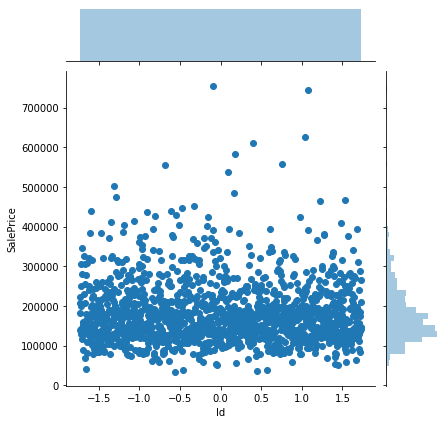

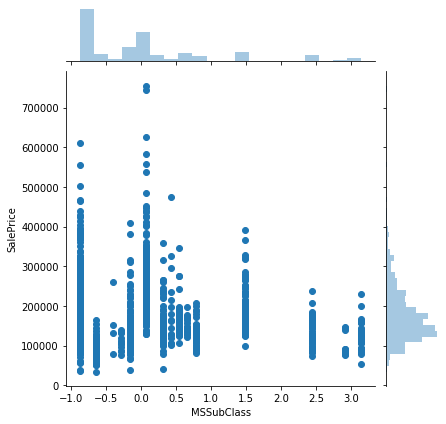

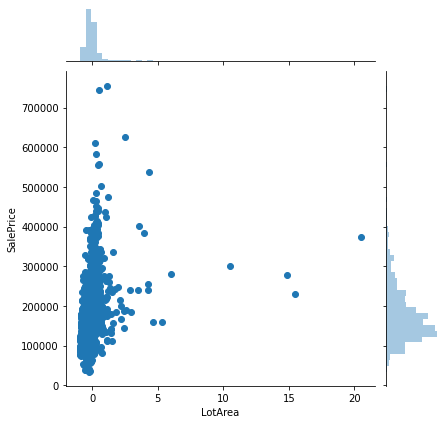

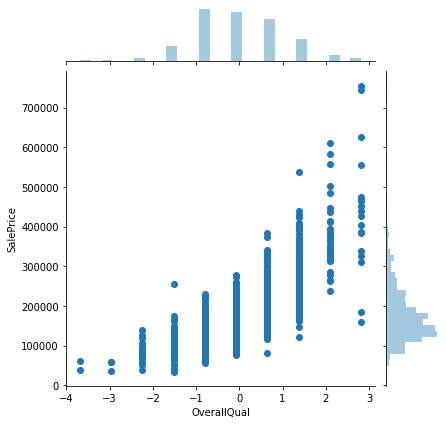

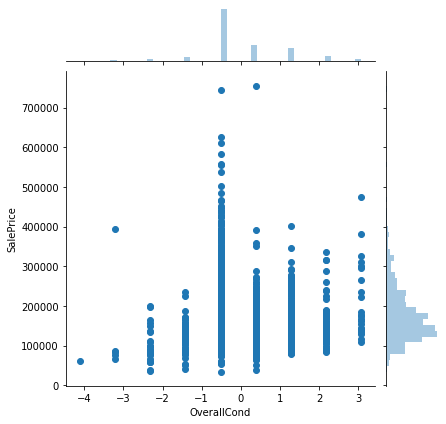

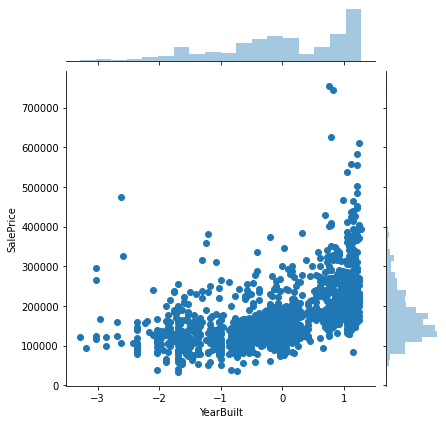

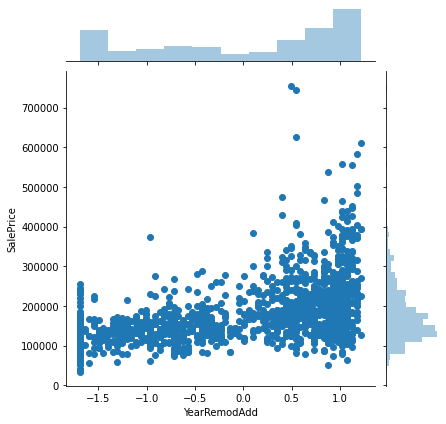

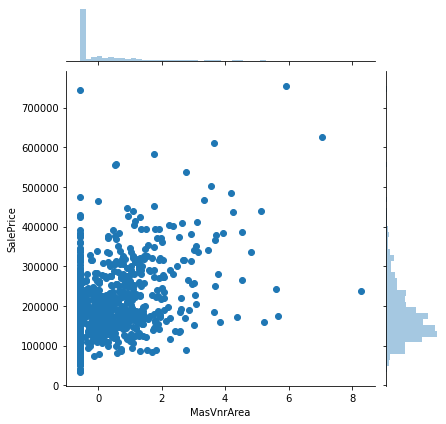

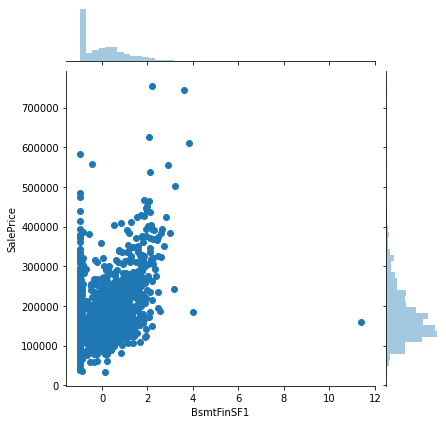

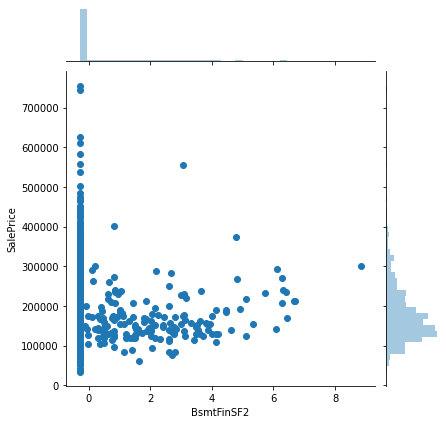

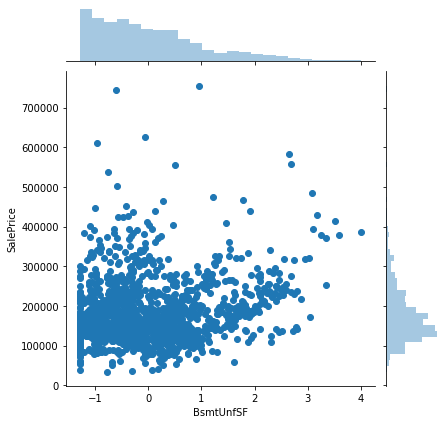

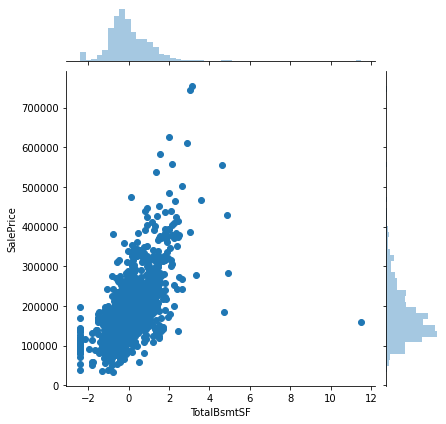

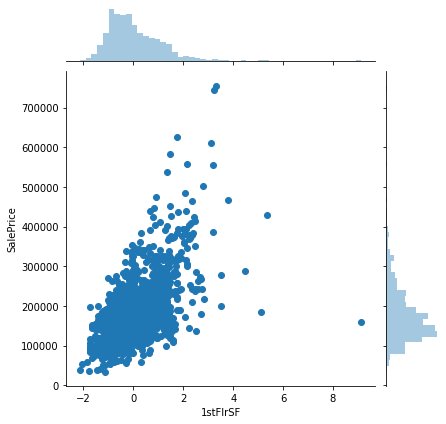

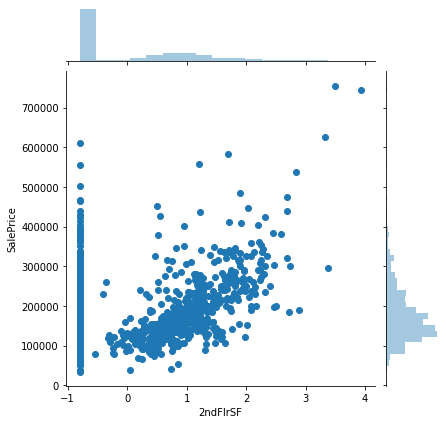

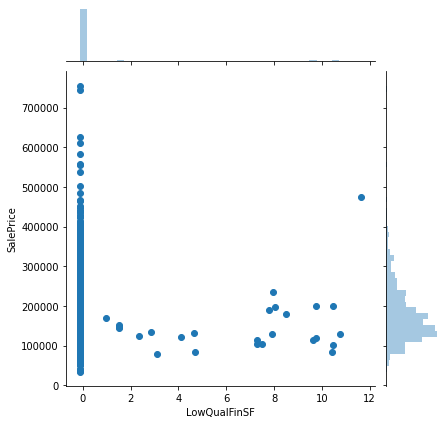

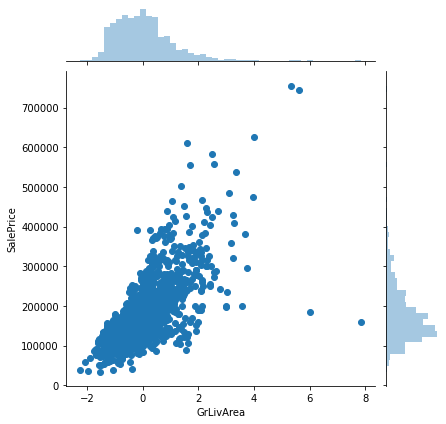

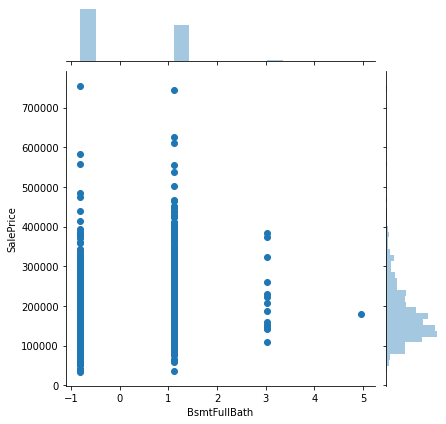

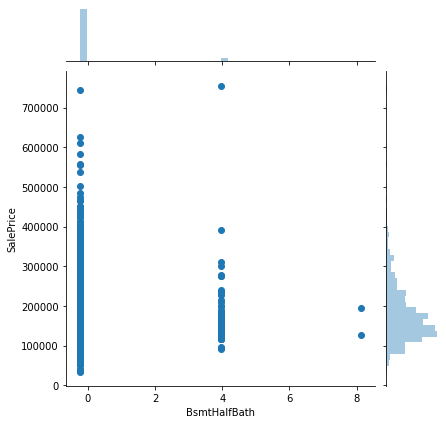

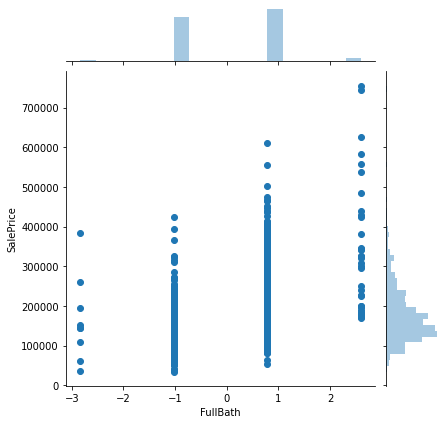

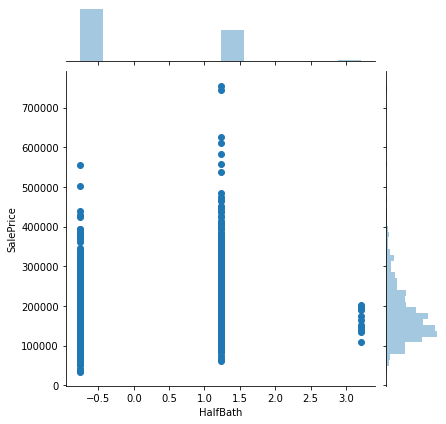

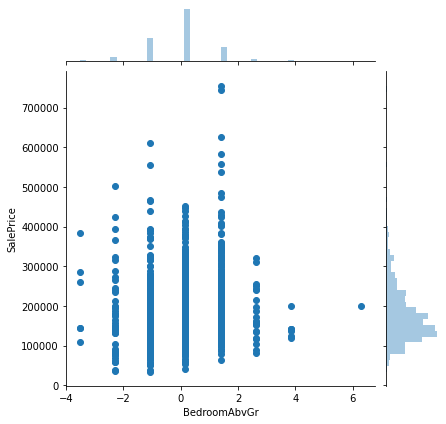

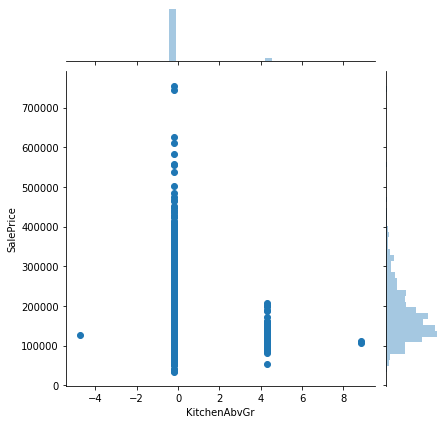

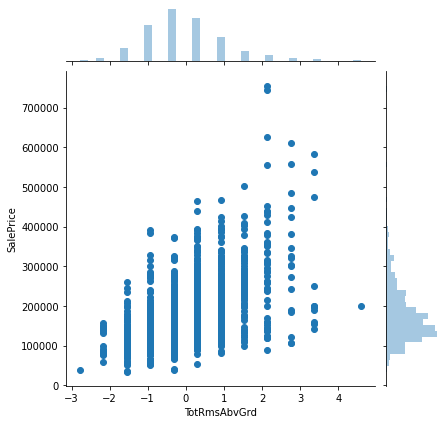

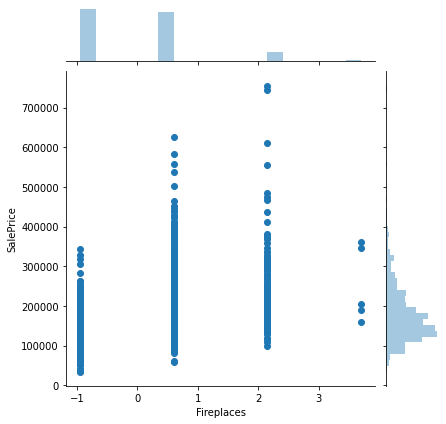

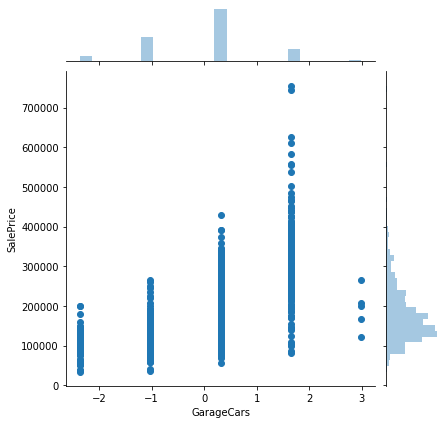

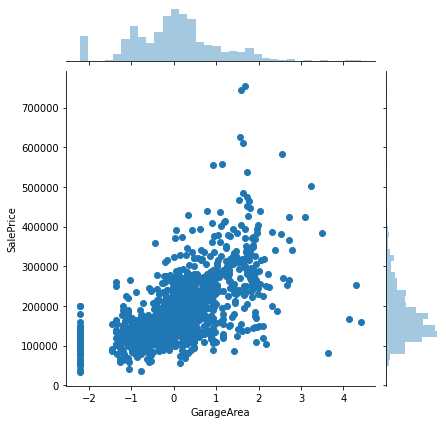

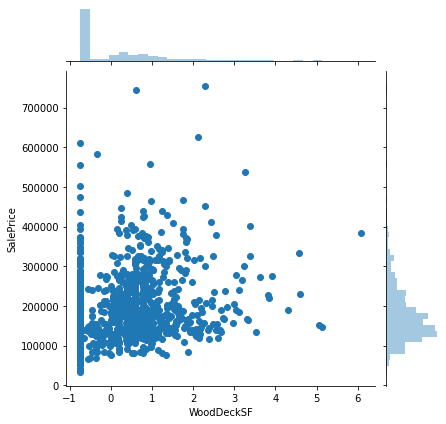

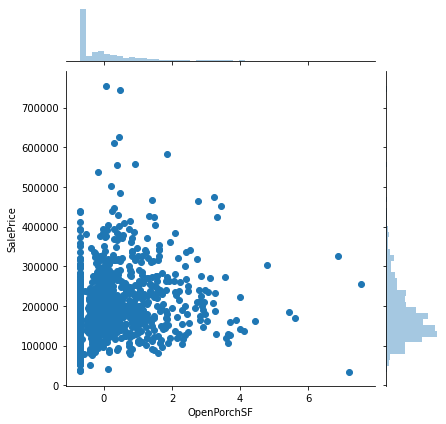

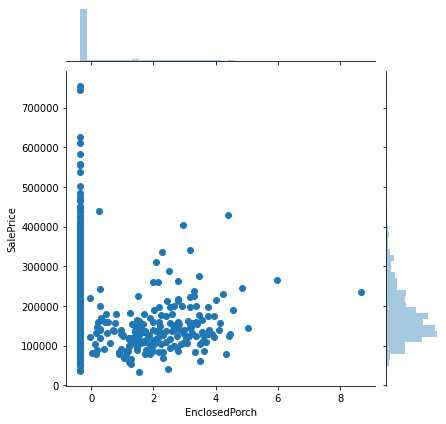

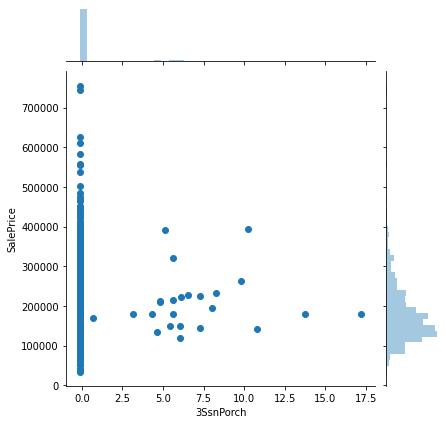

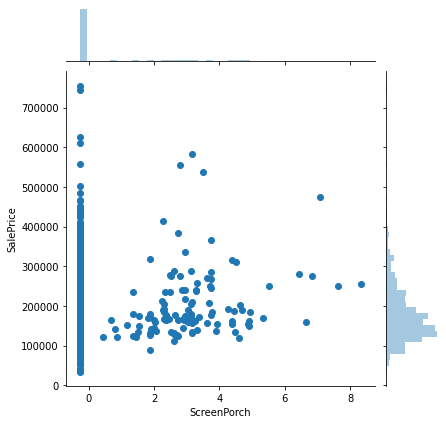

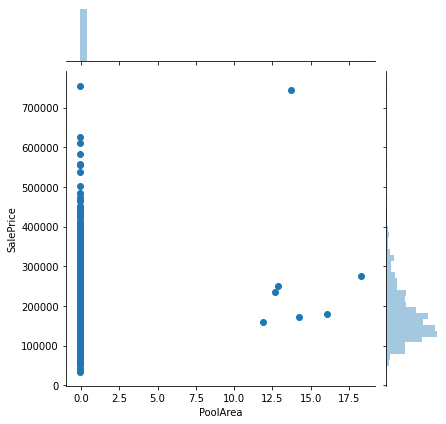

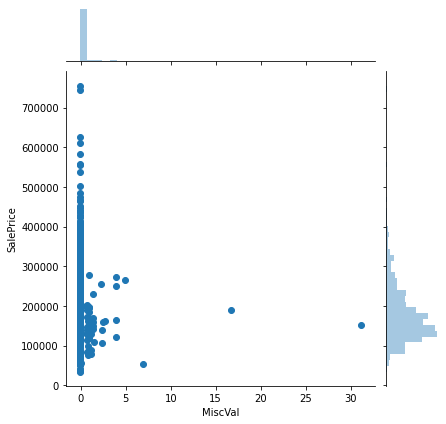

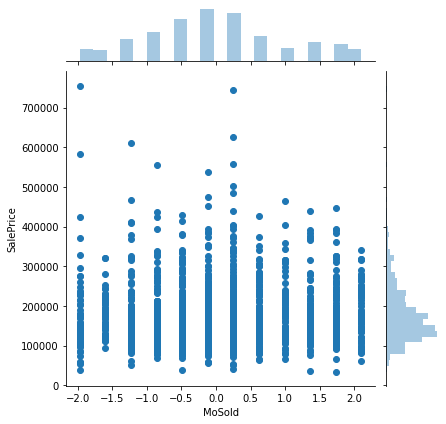

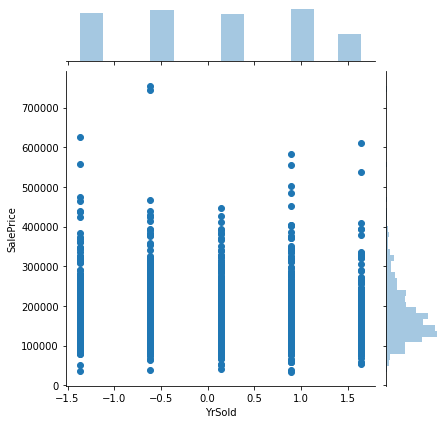

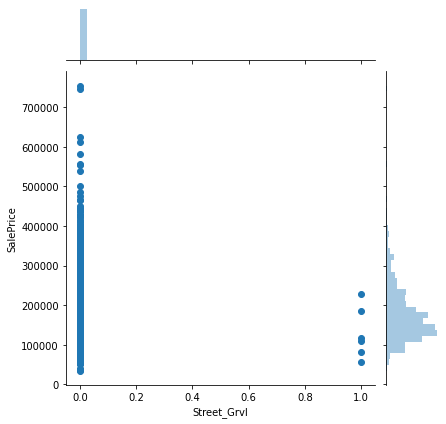

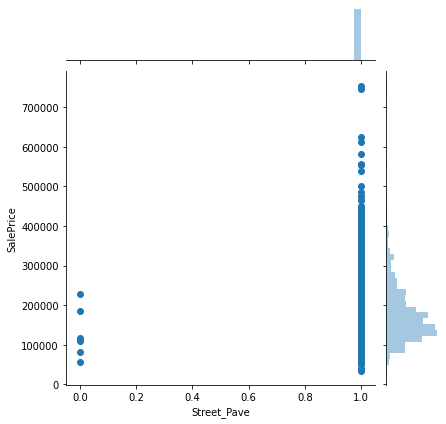

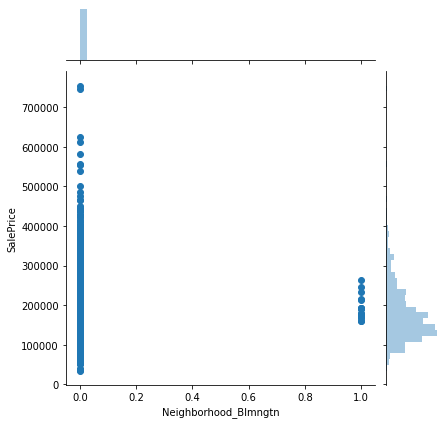

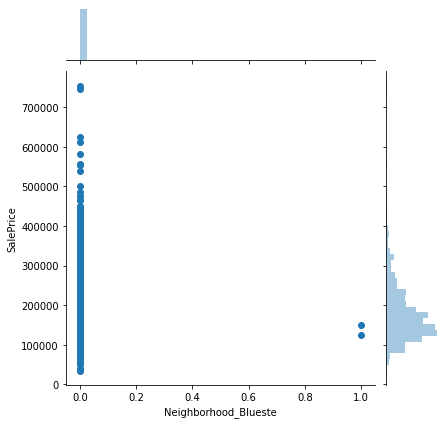

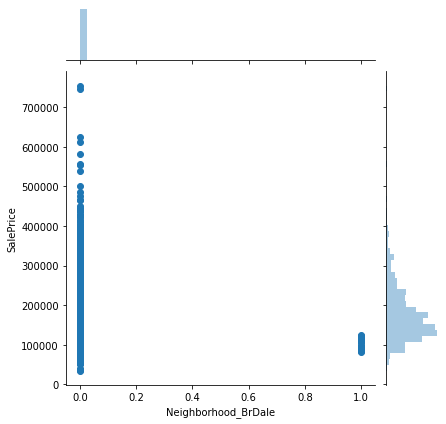

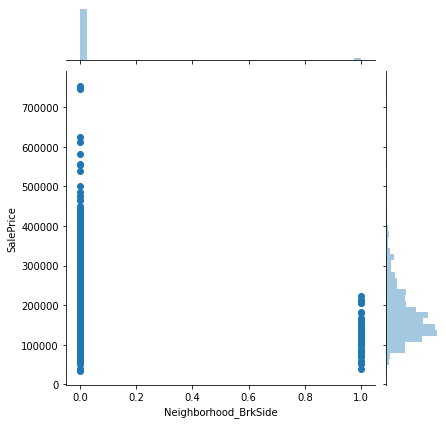

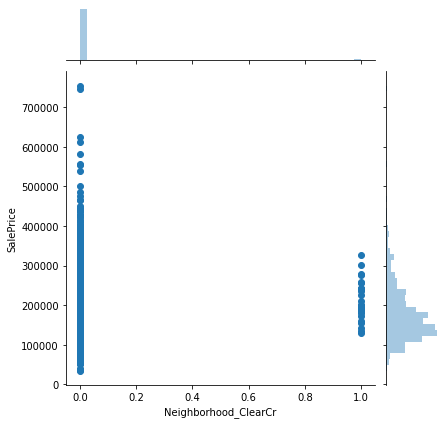

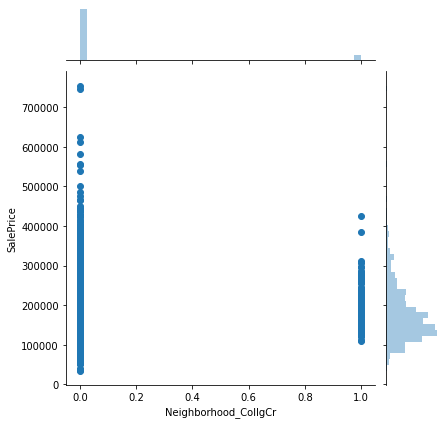

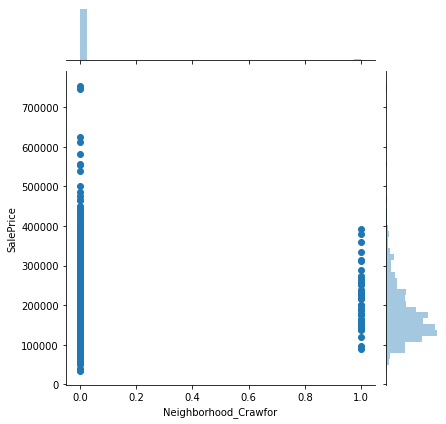

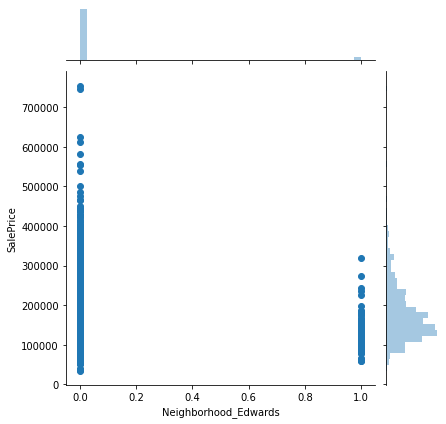

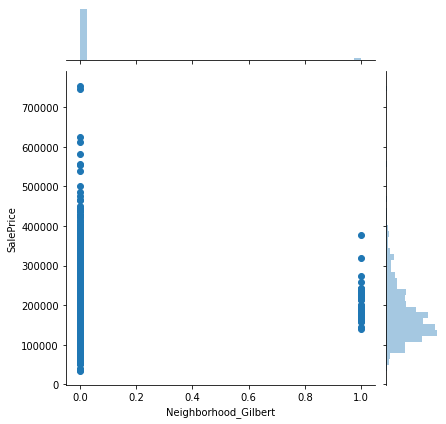

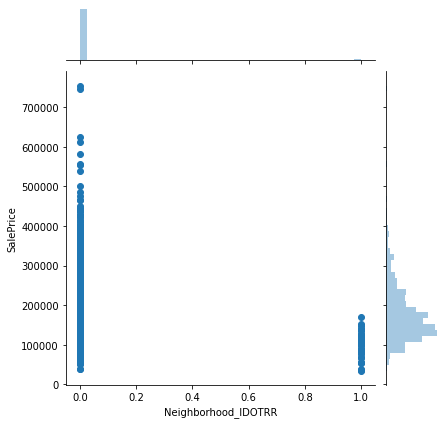

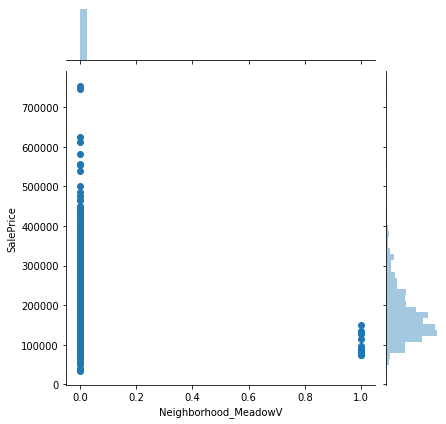

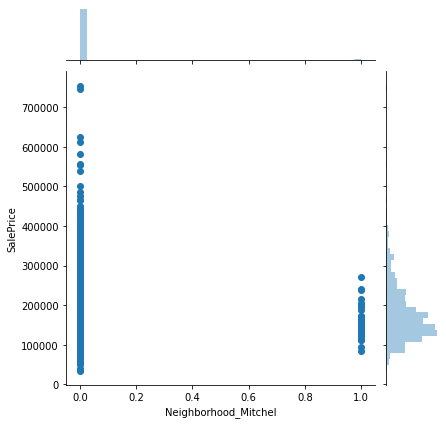

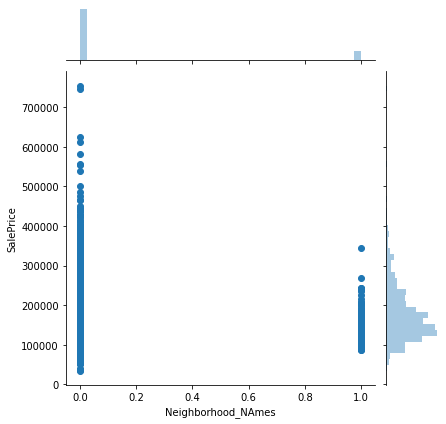

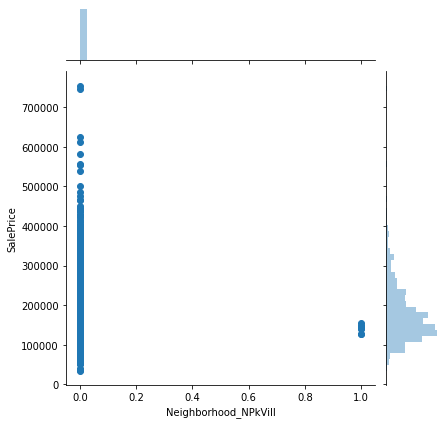

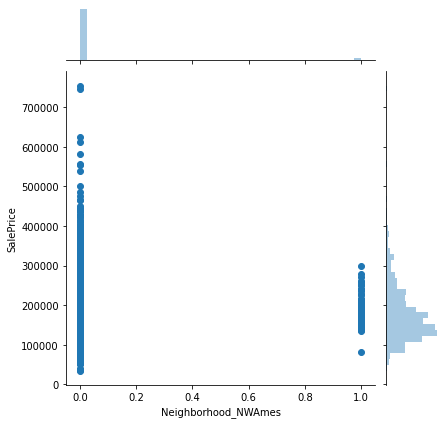

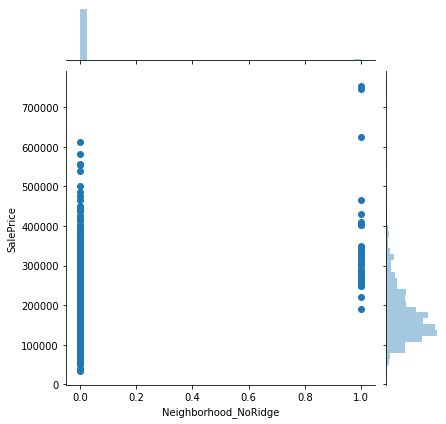

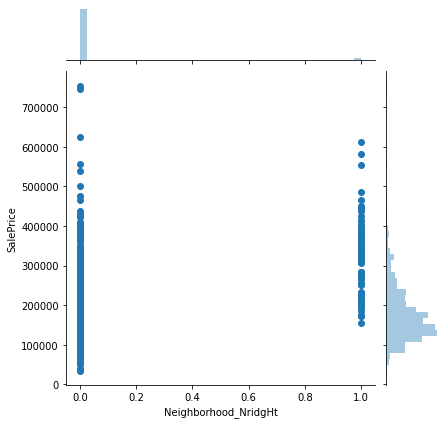

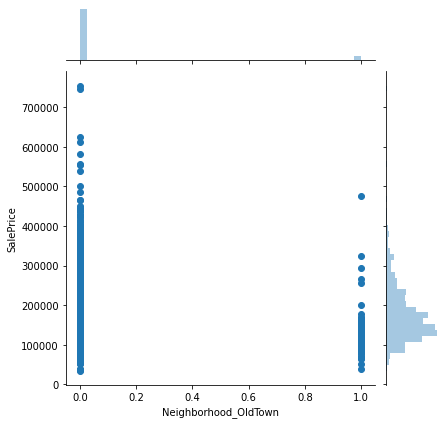

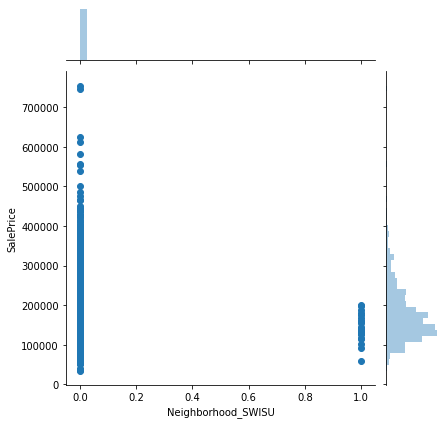

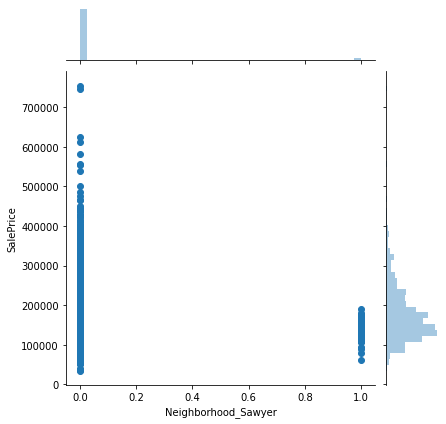

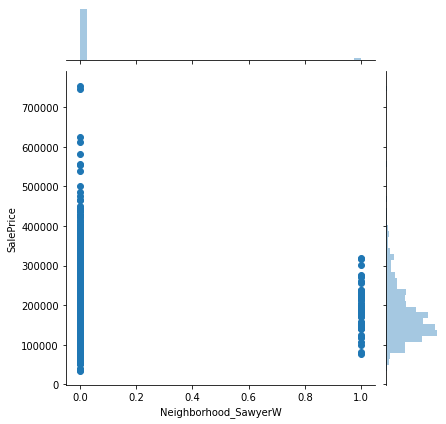

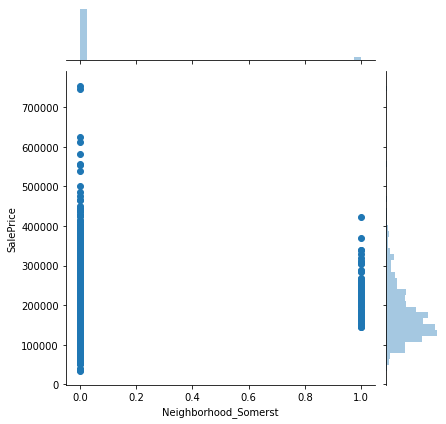

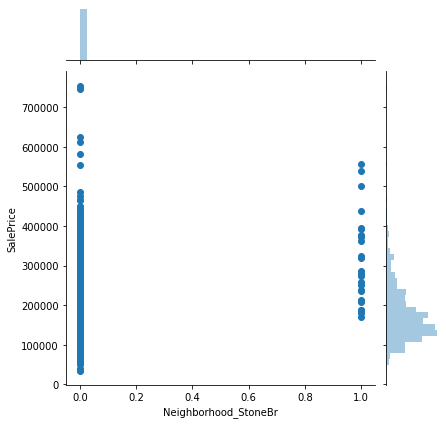

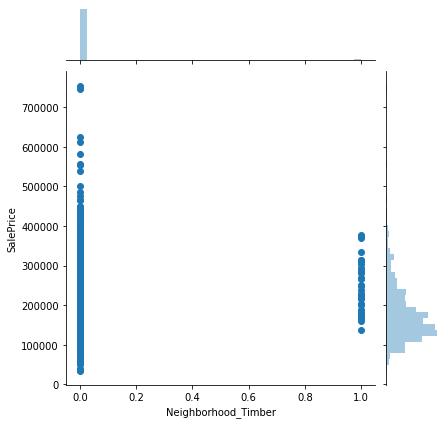

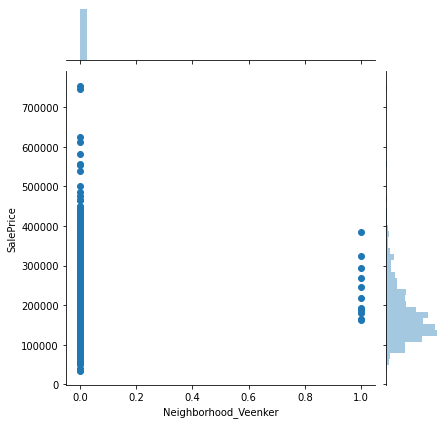

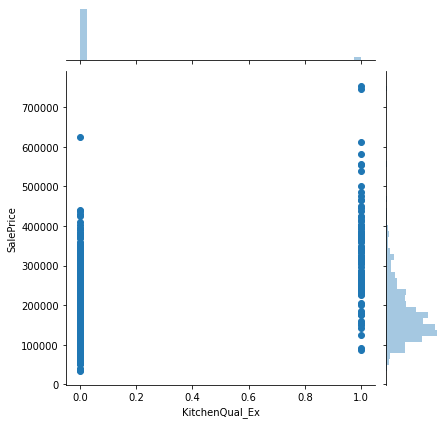

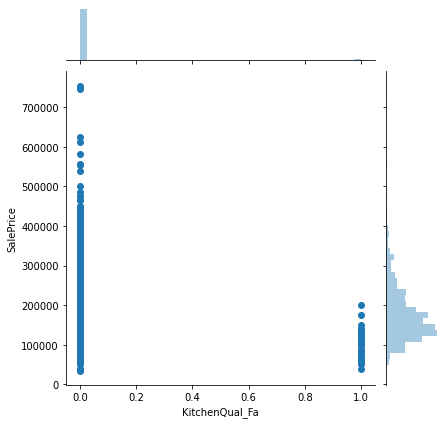

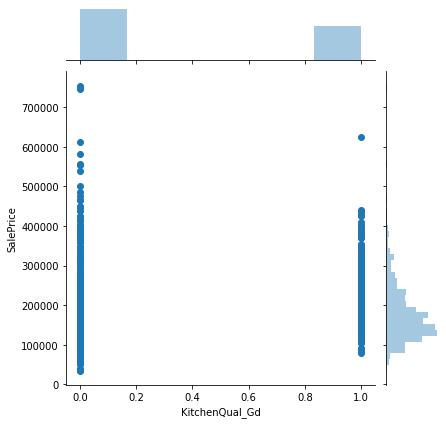

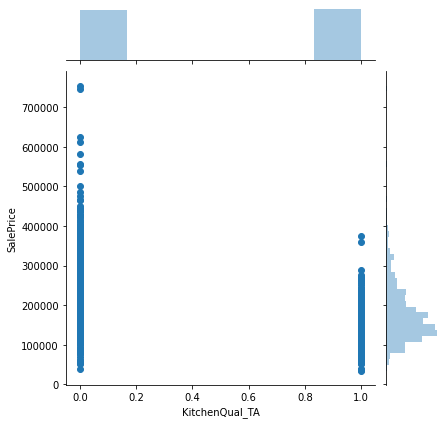

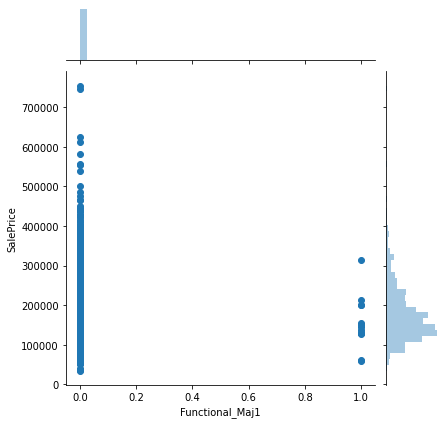

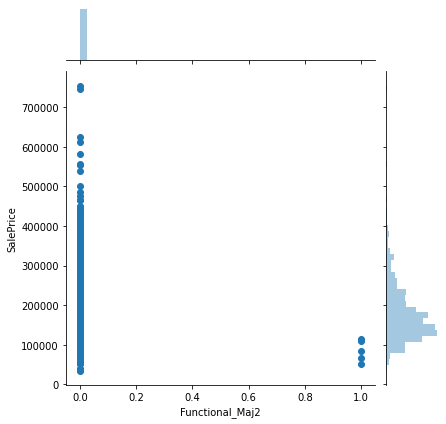

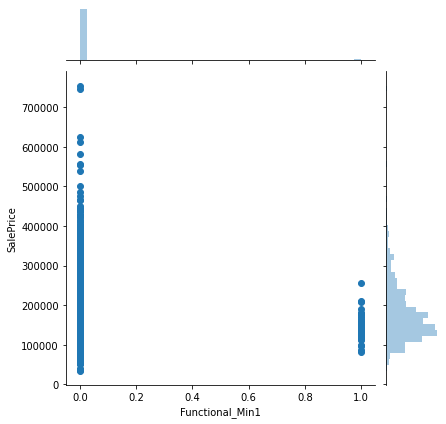

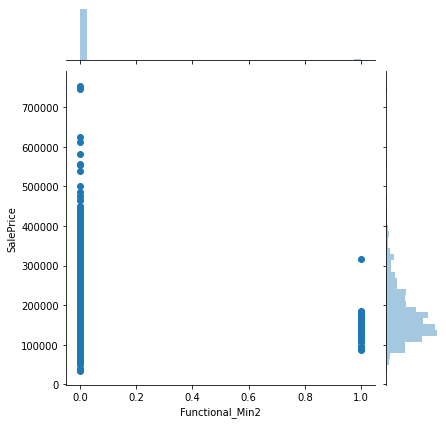

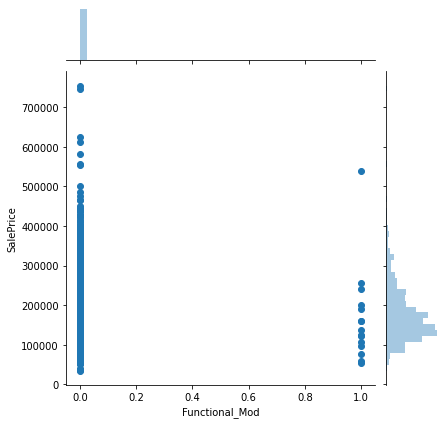

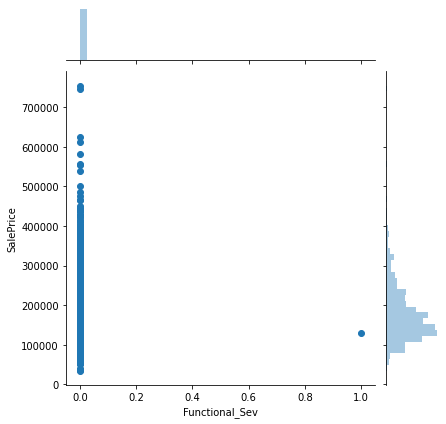

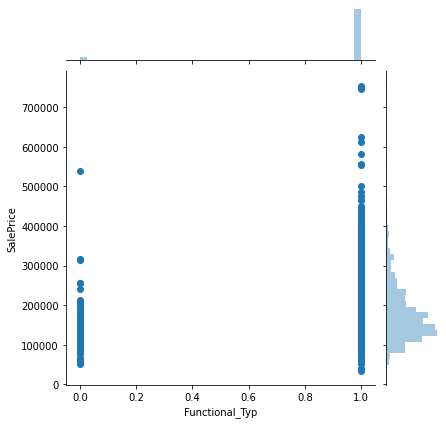

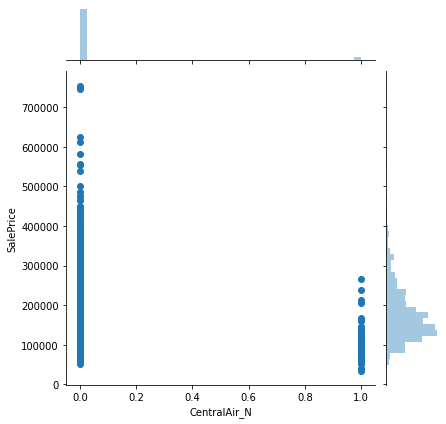

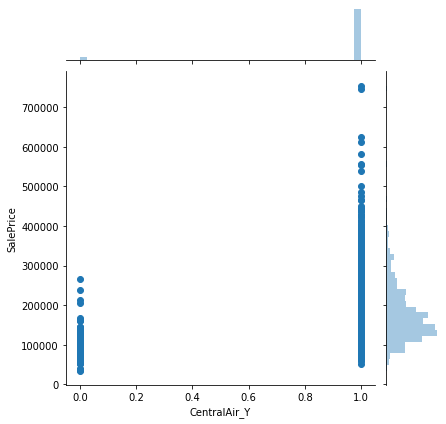

In [55]:
%matplotlib inline
for col in X_ready.columns:
    sns.jointplot(X_ready[col],y)
    # OverallQual OverallCond YearBuilt YearRemodAdd TotalBsmtSF (drop 10,12) 1stFlrSF (drop  8) 
    # TotRmsAbvGrd GarageYrBit GarageCars GarageArea

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_ready, y, test_size=0.3, random_state=42)

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
model = RandomForestRegressor(n_estimators=200,random_state=101)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [88]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 16818.348367579907
Mean Squared Error: 694185400.6978661
Root Mean Squared Error: 26347.398366781228
r2_score: 0.9005193360135615


In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
model2 = LinearRegression()
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

In [91]:


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('r2_score:', metrics.r2_score(y_test, y_pred2))

Mean Absolute Error: 19670.059360730593
Mean Squared Error: 956220869.0091324
Root Mean Squared Error: 30922.821168339935
r2_score: 0.8629681827490352


In [92]:
from xgboost import XGBRegressor

In [93]:
model3 = XGBRegressor()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

In [94]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print('r2_score:', metrics.r2_score(y_test, y_pred3))

Mean Absolute Error: 17364.36479737443
Mean Squared Error: 789580184.6242846
Root Mean Squared Error: 28099.469472292258
r2_score: 0.886848728080432


In [95]:
test = pd.read_csv("test.csv")

In [68]:
test = test.drop(["Heating","LotFrontage","GarageYrBlt"],axis=1)
X_test_objects = test[["Street", "Neighborhood", "KitchenQual", "Functional", "CentralAir"]]
X_test_numerical = test.select_dtypes(exclude=["object"])
#X_test_numerical = X_test_numerical[["OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "TotRmsAbvGrd", "GarageYrBlt", "GarageCars", "GarageArea"]]
X_test_objects_one_hot = pd.get_dummies(X_test_objects)
X_test_numerical_imputed = pd.DataFrame(si.fit_transform(X_test_numerical))
X_test_numerical_imputed.columns = X_test_numerical.columns
X_test_numerical_imputed_scaled = pd.DataFrame(sc.fit_transform(X_test_numerical_imputed))
X_test_numerical_imputed_scaled.columns = X_test_numerical_imputed.columns
X_test_ready = X_test_numerical_imputed_scaled
#X_test_ready = X_test_numerical_imputed
X_test_ready[X_test_objects_one_hot.columns]=X_test_objects_one_hot

In [69]:
X_test_objects

,Street,Neighborhood,KitchenQual,Functional,CentralAir
0,Pave,NAmes,TA,Typ,Y
1,Pave,NAmes,Gd,Typ,Y
2,Pave,Gilbert,TA,Typ,Y
3,Pave,Gilbert,Gd,Typ,Y
4,Pave,StoneBr,Gd,Typ,Y
...,...,...,...,...,...
1454,Pave,MeadowV,TA,Typ,Y
1455,Pave,MeadowV,TA,Typ,Y
1456,Pave,Mitchel,TA,Typ,Y
1457,Pave,Mitchel,TA,Typ,Y


In [70]:
for col in X_test_ready.columns:
    if col not in X_ready.columns:
        print(col)

In [49]:
pred = model3.predict(X_test_ready)

In [175]:
pd.DataFrame(pred, columns=["SalePrice"]).to_csv("submission_lr.csv",columns=["SalePrice"],index=True,index_label="Id")
data = pd.read_csv("submission_lr.csv")
data["Id"] = data["Id"].apply(lambda x: x+ 1461)
data.to_csv("submission_kg_lr.csv",index=False)